# Linear regression

Research question: What is the relationship between fertility and education?

In [7]:
#lets load the dataset for the linear regression model
data (swiss)
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


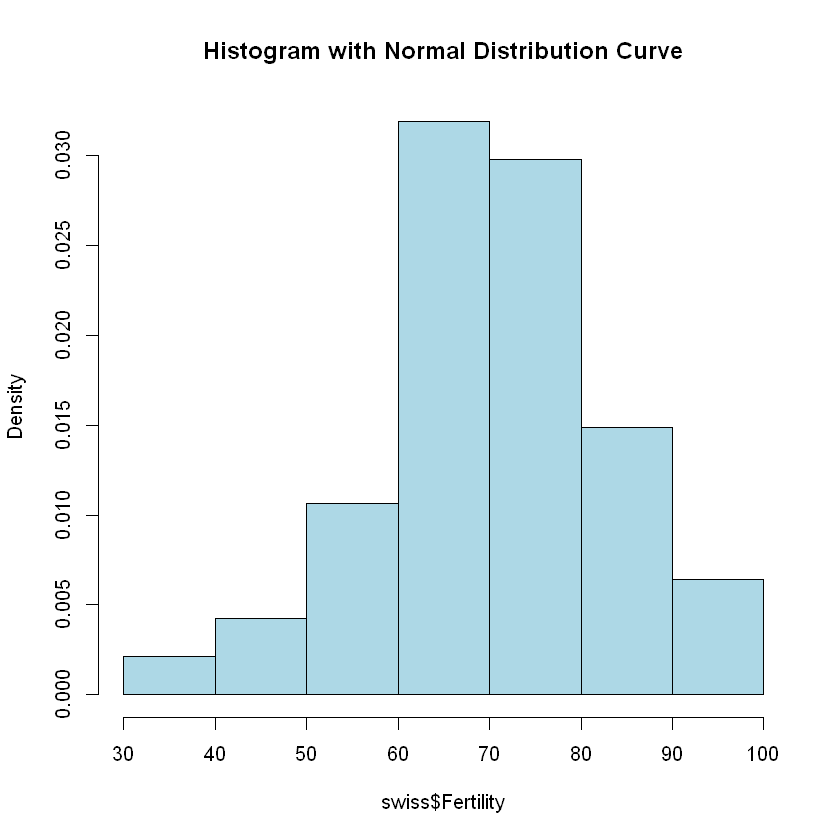

In [9]:
# Create a histogram with a normal distribution curve
hist(swiss$Fertility, probability = TRUE, col = "lightblue", main = "Histogram with Normal Distribution Curve")

According to the plot, it may assume that the outcome is normally distributed.

Now let's investigate the relationship between the fertility and the education while controlling for Examination, Catholic, Agriculture

In [14]:
# Fit a linear regression model
lm_model <- lm(Fertility ~ Education + Examination + Catholic + Agriculture, data = swiss)

# Summarize the model
summary(lm_model)


Call:
lm(formula = Fertility ~ Education + Examination + Catholic + 
    Agriculture, data = swiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7813  -6.3308   0.8113   5.7205  15.5569 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.05542    6.94881  13.104  < 2e-16 ***
Education   -0.96161    0.19455  -4.943 1.28e-05 ***
Examination -0.26058    0.27411  -0.951  0.34722    
Catholic     0.12442    0.03727   3.339  0.00177 ** 
Agriculture -0.22065    0.07360  -2.998  0.00455 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.736 on 42 degrees of freedom
Multiple R-squared:  0.6498,	Adjusted R-squared:  0.6164 
F-statistic: 19.48 on 4 and 42 DF,  p-value: 3.95e-09


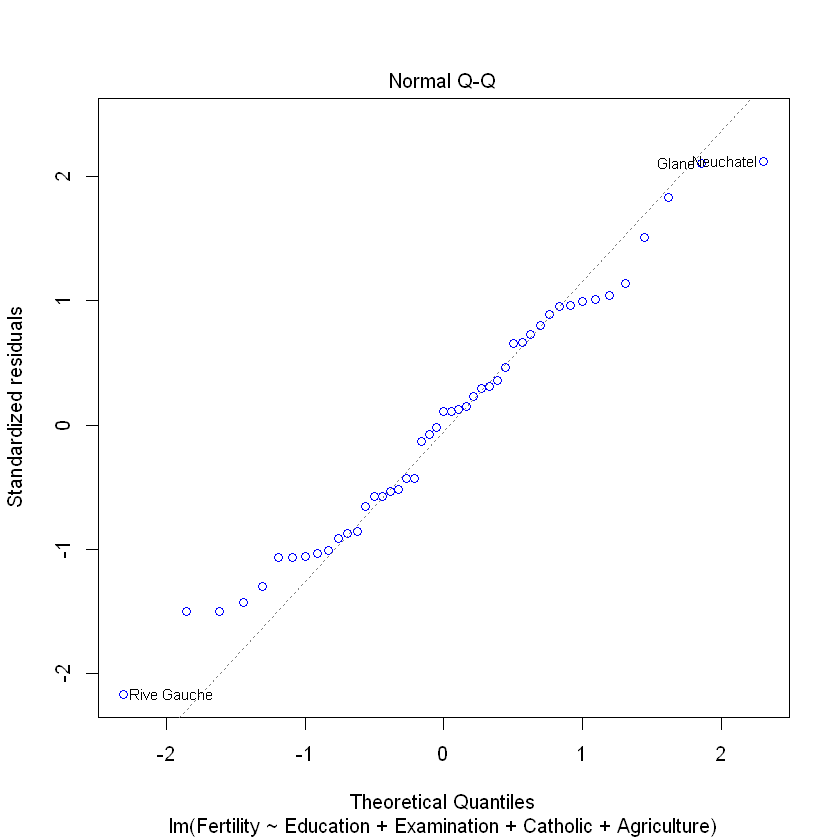

In [22]:
# Normal Q-Q Plot
plot(lm_model, which = 2, col = "blue")

# Logistic regression

In [16]:
# Define a binary outcome variable based on Fertility rate
swiss$HighFertility <- ifelse(swiss$Fertility > median(swiss$Fertility), 1, 0)

In [17]:
logit_model <- glm(HighFertility ~ Education + Examination + Catholic + Agriculture,
                   data = swiss,
                   family = binomial)
summary(logit_model)


Call:
glm(formula = HighFertility ~ Education + Examination + Catholic + 
    Agriculture, family = binomial, data = swiss)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.07058  -0.37397  -0.01366   0.43406   1.60842  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) 14.02121    5.10091   2.749  0.00598 **
Education   -0.15114    0.09363  -1.614  0.10647   
Examination -0.43822    0.17297  -2.533  0.01129 * 
Catholic     0.02535    0.01403   1.807  0.07078 . 
Agriculture -0.12432    0.04825  -2.576  0.00998 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 65.135  on 46  degrees of freedom
Residual deviance: 28.952  on 42  degrees of freedom
AIC: 38.952

Number of Fisher Scoring iterations: 6
